In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import r2_score

In [2]:
# Use matplotlib's ggplot style
plt.style.use('ggplot')

In [3]:
# Enable IPython's matplotlib mode
# Use the inline backend, which embeds plots inside the Notebook:
%matplotlib inline

# Enable matplotlib's interactive backend for use in the notebook, 'nbagg'.
# With this backend you get interactive panning and zooming of matplotlib figures in the browser.
% matplotlib notebook

In [4]:
# Get flu data
data = pd.read_csv('http://www.people.fas.harvard.edu/~msantill/Mauricio_Santillana/Teaching_files/CDC_and_Google_correlate.csv', 
                   index_col='Date', comment='#', parse_dates=True)

X = data.iloc[:,1:]
y = data['Influenza-like Illness (CDC) ']

<IPython.core.display.Javascript object>


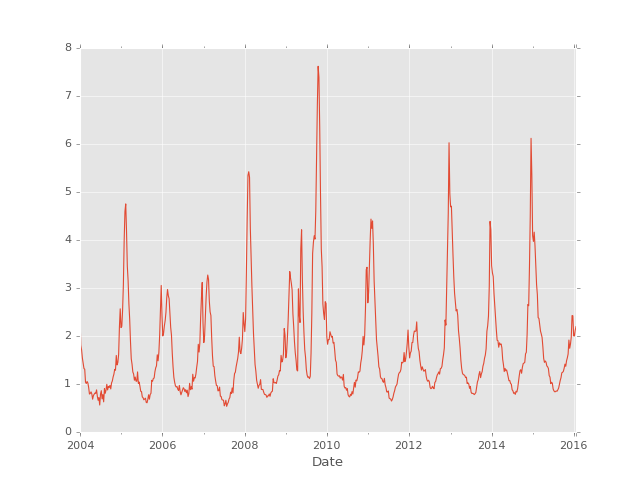

In [5]:
plt.figure();
y.plot();

In [6]:
# Split data in train set and test set
X_train, y_train = X.loc[:'20111231',:], y[:'20111231']
X_test, y_test = X.loc['20120101':,:], y['20120101':]

<IPython.core.display.Javascript object>


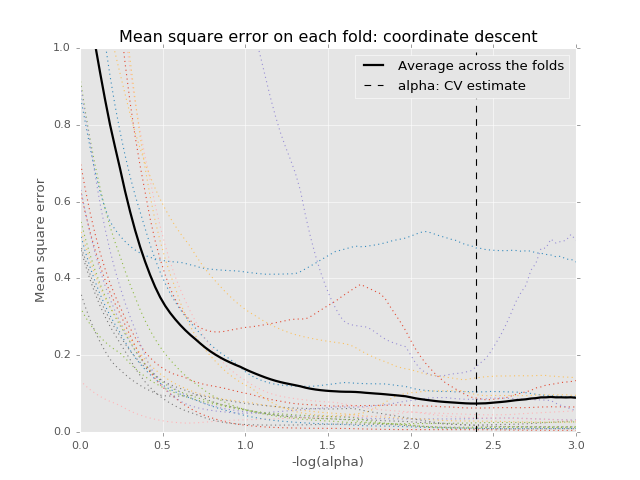

In [7]:
# Lasso model selection

# Compute paths
model = LassoCV(max_iter=1e4, cv=20).fit(X, y)

# Display results
m_log_alphas = -np.log10(model.alphas_)

plt.figure();
plt.plot(m_log_alphas, model.mse_path_, ':');
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k', 
         label='Average across the folds', linewidth=2);
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k', 
           label='alpha: CV estimate');

plt.legend();

plt.xlabel('-log(alpha)');
plt.ylabel('Mean square error');
plt.title('Mean square error on each fold: coordinate descent');
plt.axis('tight');
ymin, ymax = 0, 1
plt.ylim(ymin, ymax);

In [8]:
# Lasso
alpha = model.alpha_
lasso = Lasso(alpha=alpha, max_iter=1e4)

y_pred = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred)
print(lasso)
print("r^2 on test data: %f" % r2_score_lasso)

Lasso(alpha=0.0040345240737539902, copy_X=True, fit_intercept=True,
   max_iter=10000.0, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data: 0.751123


In [9]:
y_pred = pd.Series(y_pred, index=y_test.index)

<IPython.core.display.Javascript object>


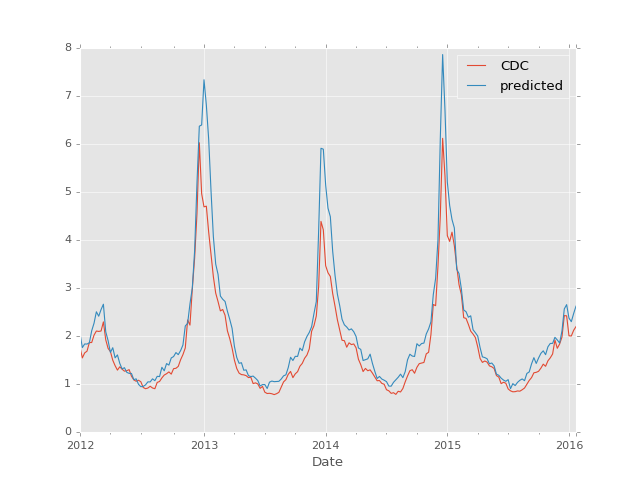

In [10]:
plt.figure();
y_test.plot(label='CDC');
y_pred.plot(label='predicted');

plt.legend();

In [11]:
for month in y_test.index:
    lasso.fit(X.loc[:month,:], y[:month])
    y_pred[month] = lasso.predict(X.loc[month].reshape(1,-1))

<IPython.core.display.Javascript object>


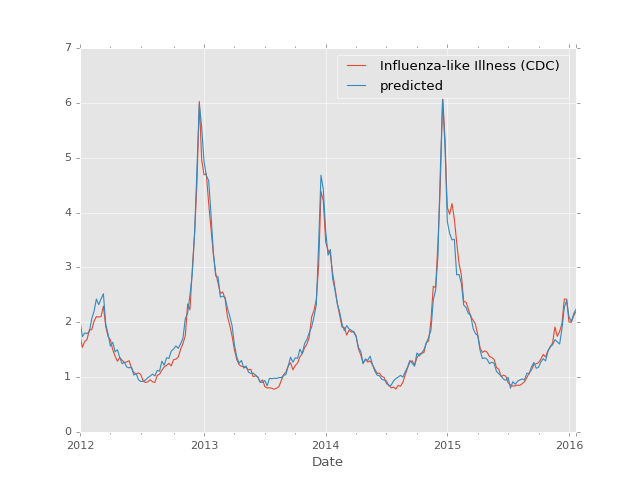

In [12]:
plt.figure();
y_test.plot();
y_pred.plot(label='predicted');
plt.legend();